# Machine Learning Engineer Nanodegree-Udacity

# PROJECT : TITANIC DATASET INVESTIGATION

## Name : Ajith.N.M

## TASK:  1 - To compare the survival rate in titanic by Gender 
## TASK:  2 - To compare the survival rate by Age

### Source : Titanic.csv

## Importing necessary data

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 20

In [49]:
titanic_data=pd.read_csv('titanic_data.csv')

In [51]:
titanic_data.shape

(891, 12)

Titanic_data.csv contains 891 records and 12 variables

In [52]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 1 
### To compare the survival rate in titanic by Gender

In [54]:
###Group passengers by survivorship and gender for furthur analysis

survived = titanic_data.loc[titanic_data['Survived'] == 1]
survived_count = len(survived['Name'])

survived_male = survived.loc[survived['Sex'] == 'male']
survived_male_count = len(survived_male['Name'])

survived_female = survived.loc[survived['Sex'] == 'female']
survived_female_count = len(survived_female['Name'])

non_survived = titanic_data.loc[titanic_data['Survived'] == 0]
non_survived_count = len(non_survived['Name'])

non_survived_male = non_survived.loc[non_survived['Sex'] == 'male']
non_survived_male_count = len(non_survived_male['Name'])

non_survived_female = non_survived.loc[non_survived['Sex'] == 'female']
non_survived_female_count = len(non_survived_female['Name'])

### Visual Representation

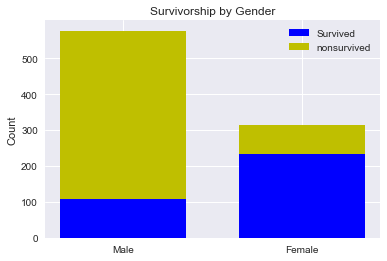

In [64]:
ind = np.arange(2)
width = 0.7

p1 = plt.bar(ind, (survived_male_count, survived_female_count), width, color='b')
p2 = plt.bar(ind, (non_survived_male_count, non_survived_female_count), 
             width, bottom=(survived_male_count, survived_female_count), color='y')

plt.ylabel('Count')
plt.title('Survivorship by Gender')
plt.xticks(ind, ('Male', 'Female'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'nonsurvived'))

plt.show()

### Male survival rate

In [57]:
print ('Male survival rate is', '%.4f' %(survived_male_count / (survived_male_count + non_survived_count)))

Male survival rate is 0.1657


### Female survival rate

In [58]:
print ('Female survival rate is', '%.4f' %(survived_female_count / (survived_female_count + non_survived_count)))

Female survival rate is 0.2980


## Task 2:
### To compare the survival rate by Age

In [59]:
len(titanic_data.loc[titanic_data['Survived'] == 1]) / len(titanic_data.loc[titanic_data['Survived']])

0.3838383838383838

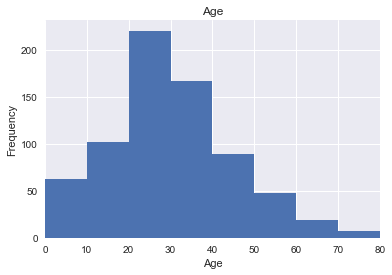

In [61]:
titanic_data.hist(column="Age", bins=range(0,90,10))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim([0,80])
plt.show()

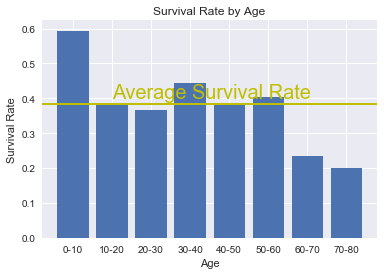

In [62]:
binned_by_age = []
survival_by_age = []

for i in range (0,8):
    binned_by_age.append(titanic_data.loc[(titanic_data['Age'] <= (i + 1) * 10) & (titanic_data['Age'] > i * 10)])
for j in range (0,8):
    if len(binned_by_age[j]) != 0:
        survival_by_age.append(len(binned_by_age[j].loc[titanic_data['Survived'] == 1])/len(binned_by_age[j]))
    else: survival_by_age.append(0)

objects = ['0-10', '10-20','20-30', '30-40','40-50','50-60','60-70', '70-80']
y_pos = np.arange(len(objects))
plt.bar(y_pos, survival_by_age)
plt.xticks(y_pos, objects)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.axhline(y=.383838, xmin=0, xmax=80, linewidth=2, color = 'y')
plt.text(1,0.4,'Average Survival Rate', color = 'y')
plt.show()

## Conclusion:

#### In this project i explored TITANIC DATA SET and found solutions for, 1) Survival rate by Gender, 2) Survival rate by Age. 
#### Deleted the rows with the missing ages - this would limit the accuracy of the analysis of the gender , however the accuracy of the analysis of the Age factor would be more accurate
#### From the above visualizations, we can also conclude that Childrens from age (0 - 10) were given preference to the life boats/life jackets which influenced their chances of survival.

## Issue i faced

#### Multiple datas were missing in the given data set. 

### Future enhancement

#### The survey can be made based on the
* passanger class
* Embarked
* cabin
